In [2]:
groups = ['worldofwarcraft', 'dota2', 'leagueoflegends', 'fortnite', 'wgcsgo']

In [3]:
import matplotlib.pyplot as plt
import PIL

# Рады пердставить вам проект GameCommunity

"С самого рождения, через игры мы изучаем этот мир. Взрослея, наше стремлении к знанию возрастает. Мы начинаем искать все больше ответов на свои вопросы. Но не зависимо от возраста игры остаются лучшим инструментом познания мира."

Мы решили изучить популярные игровые сообщества. (Dota2, CS GO, World of warcraft, League of legends, Fortnite)

#### Первым делом мы рассмотрели соотношение парней и девушек в сообществах:


![title](data/dota2/dota2_sex.png)
![title](data/wgcsgo/wgcsgo_sex.png)
![title](data/worldofwarcraft/worldofwarcraft_sex.png)
![title](data/leagueoflegends/leagueoflegends_sex.png)
![title](data/fortnite/fortnite_sex.png)

#### Так же мы решили посмотреть на возрастные группы. 
Интересно, что распределение возраста также зависит от даты выхода игры. Мы можем наблюдать, что основные игроки world of warcraft в возрасте от 18 до 30 (Дата выхода 23 ноября 2004), в то время, как основной возраст играков fortnite от 14 до 22 (Дата выхода 21 июля 2017)

![title](data/dota2/dota2_age.png)
![title](data/wgcsgo/wgcsgo_age.png)
![title](data/worldofwarcraft/worldofwarcraft_age.png)
![title](data/leagueoflegends/leagueoflegends_age.png)
![title](data/fortnite/fortnite_age.png)

#### Мы пошли дальше и рассмотрели другие группы на которые подписаны эти люди

![title](data/dota2/dota2_groups.png)
![title](data/wgcsgo/wgcsgo_groups.png)
![title](data/worldofwarcraft/worldofwarcraft_groups.png)
![title](data/leagueoflegends/leagueoflegends_groups.png)
![title](data/fortnite/fortnite_groups.png)

#### А также рассмотрели основные тематики группы на которые подписаны игроки

![title](data/dota2/dota2_topics.jpg)
![title](data/wgcsgo/wgcsgo_topics.jpg)
![title](data/worldofwarcraft/worldofwarcraft_topics.jpg)
![title](data/leagueoflegends/leagueoflegends_topics.jpg)
![title](data/fortnite/fortnite_topics.jpg)

#### До этого момента мы не исследовали профили подписчиков этих групп. Давает, для начала, рассмотрим какой тип публикаций чаще всего встречается на страницах пользователей:

![title](data/dota2/dota2_type_post.png)
![title](data/wgcsgo/wgcsgo_type_post.png)
![title](data/worldofwarcraft/worldofwarcraft_type_post.png)
![title](data/leagueoflegends/leagueoflegends_type_post.png)
![title](data/fortnite/fortnite_type_post.png)

#### Чтобы понять о чем говорят эти публикации мы решили использовать LDA для поиск ключевых слов. 
На основе этого мы построили "Облака слов". Эти изображения показывают, какие слова являются основными в репостах: 

## Dota2

![title](data/top_words/repost_dota2.jpg)

## CS GO

![title](data/top_words/repost_wgcsgo.jpg)

## World of warcraft

![title](data/top_words/repost_worldofwarcraft.jpg)

## League of legends

![title](data/top_words/repost_leagueoflegends.jpg)

## Fortnite

![title](data/top_words/repost_fortnite.jpg)

## Общий обзор

![title](data/top_words/repost_all.jpg)

#### Вывод:
Изучив ключевые слова мы понимаем, что большинство репостов связаны с розыгрышами (в основном розыгрыают игровые предметы, либо оснощение для компьютера). Например, в репостах игроков world of warcraft, часто встречаются игровые ингредиенты, а игроков Dota2 чаще интересуют компьютерные аксессуары.

#### А теперь давайте рассмотрим прочие публикации:

## Dota 2

![title](data/top_words/text_dota2.jpg)

## CS GO

![title](data/top_words/text_wgcsgo.jpg)

## World of warcraft

![title](data/top_words/text_worldofwarcraft.jpg)

## League of legends

![title](data/top_words/text_leagueoflegends.jpg)

## Fortnite

![title](data/top_words/text_fortnite.jpg)

## Общий обзор

![title](data/top_words/text_all.jpg)

## Код этого исследования вы можете найти ниже


## Парсим подписчиков групп

In [6]:
import numpy as np
import operator
import json
import vk

In [3]:
token = '2a9f544d2a9f544d2a9f544d682af6697e22a9f2a9f544d7618af27caeecb92aae50748'  # Сервисный ключ доступа
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)

#### \# Все данные уже собраны, поэтому шаг можно пропустить

In [4]:
# Функция формирования базы участников сообщества в виде списка
def get_members(groupid):
    first = vk_api.groups.getMembers(group_id=groupid, v=5.92) # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id добавляется к нашему списку.
    for i in range(1, count + 1):
        data = data + vk_api.groups.getMembers(group_id=groupid, v=5.92, offset=i*1000)["items"]
    return data


# Функция сохранения базы в txt файле
def save_data(data, filename="data.txt"):
    with open(filename, "w") as file:  # Открываем файл на запись
        # Записываем каждый id в новой строке,
        # добавляя в начало "vk.com/id", а в конец перенос строки.
        for item in data:
            file.write("vk.com/id" + str(item) + "\n")

"""
for group in groups:
    print('Start to parse {}'.format(group))
    data = get_members('{}'.format(group))
    save_data(data, 'data/{}.txt'.format(group))
"""

"\nfor group in groups:\n    print('Start to parse {}'.format(group))\n    data = get_members('{}'.format(group))\n    save_data(data, 'data/{}.txt'.format(group))\n"

## Парсим стены пользователей

In [5]:
import random
import os
import vk

In [18]:
token = '45708ab345708ab345708ab3c0451e2fb64457045708ab3188bf174880fe2406a7e83d6' # Иногда стоит менять токены...
session = vk.Session(access_token=token)
vk_api = vk.API(session)

#### \# Мы уже выполнили этот шаг , поэтому его можно пропустить

In [7]:
def parse_wall(group, data):
    arr = []
    for i in data:
        tmp = i.split('id')[1]
        tmp = int(tmp.split('\n')[0])
        arr.append(tmp)

    random.shuffle(arr)
    final = {}
    counter = 0
    if os.path.exists(f'data/{group}.json'):
        with open(f'data/{group}.json') as f:
            final = json.load(f)
    for i in range(len(arr)):
        id = arr[i]
        max_persons = 2000
        try:
            user = vk_api.users.get(user_ids=id, v=5.92, fields=['sex', 'bdate', 'city', 'country', 'home_town', 'photo_id'])[0]
            if len(user['bdate'].split('.')) == 3 and user['city']['id'] == 1:  # Check age and city
                sub = vk_api.users.getSubscriptions(user_id=id, v=5.92)
                wall = vk_api.wall.get(owner_id=user['id'], v=5.92)
                d = {'user': user,
                     'wall': wall,
                     'sub': sub}
                final[id] = d
                if counter >= max_persons:
                    break
                print('{} - {}'.format(group, counter))
                counter += 1
                if counter % 50 == 0:
                    with open(f'data/{group}.json', 'w') as f:
                        json.dump(final, f, separators=(',', ':'), indent=4)
        except Exception as e:
            pass
        
    with open(f'data/{group}.json', 'w') as f:
        json.dump(final, f, separators=(',', ':'), indent=4)

'''
for group in groups:
    try:
        with open(f'data/{group}.txt', 'r') as f:
            data = f.readlines()
            result = parse_wall(group, data)
            if result is False:
                print('Change token and start with {}'.format(group))
                break
    except Exception as e:
        print(str(e))
'''

"\nfor group in groups:\n    try:\n        with open(f'data/{group}.txt', 'r') as f:\n            data = f.readlines()\n            result = parse_wall(group, data)\n            if result is False:\n                print('Change token and start with {}'.format(group))\n                break\n    except Exception as e:\n        print(str(e))\n"

## Давайте посмотрим на соотношение девушек и парней в группах

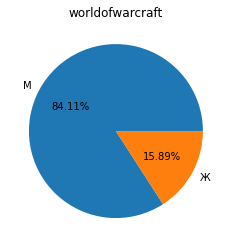

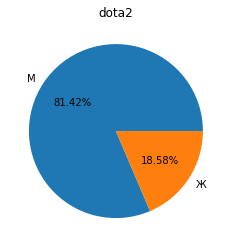

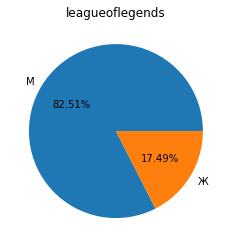

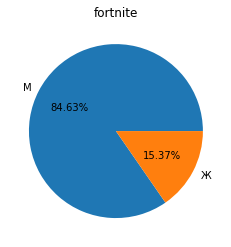

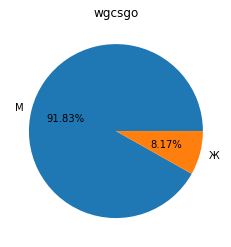

In [11]:
for group in groups:
    woman = 0
    man = 0
    
    with open(f'data/{group}.json', 'r') as f:
        data = json.load(f)
    for i in data.keys():
        if int(data[i]['user']['sex']) == 2:
            man += 1
        else:
            woman += 1
    # print(f'{round((woman / (man + woman)) * 100)}% - {group}')
    # fig1, ax1 = plt.subplots()
    plt.title(f'{group}')
    plt.pie([man, woman], labels=['М', 'Ж'], autopct='%1.2f%%')
    # plt.savefig(f'data/{group}/{group}_sex.png')
    plt.show()

## Исследуем распределение возрастов подписчиков

In [10]:
import datetime

In [11]:
# Для начала вычисляем возраст подписчиков
def age(file_name):
    ages = {}
    mean_age = 0

    for i in range(14, 61):
        ages[i] = 0

    with open(file_name) as f:
        data = json.load(f)
        key = data.keys()

    for k in key:
        item = data[k]
        user = item['user']
        date = user['bdate']
        today = datetime.datetime.today()
        bdate = datetime.datetime.strptime(date, "%d.%m.%Y")

        diff = today.year - bdate.year
        mean_age += diff

        if 14 <= diff <= 60:
            ages[diff] += 1

    mean_age /= len(data)
    mean_age = int(mean_age)
    return [ages, mean_age]


for group in groups:
    ages, mean_age = age(f'data/{group}.json')
    result = {'age': ages, 'mean_age': mean_age}
    
    # Сохраняем данные в файлы
    with open(f'data/{group}/{group}_age.json', 'w') as outfile:
        json.dump(result, outfile, separators=(',', ':'), indent=4)


In [12]:
from scipy.interpolate import interp1d
import matplotlib.ticker as ticker
import pylab

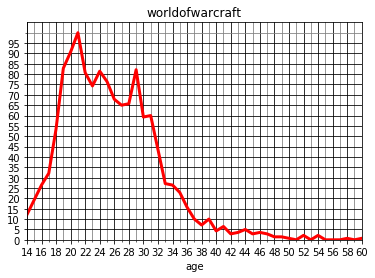

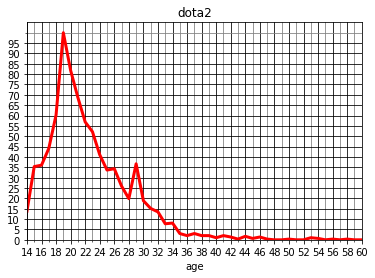

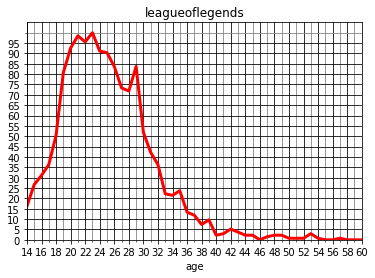

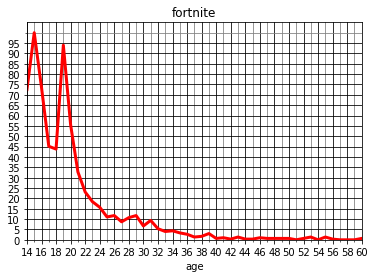

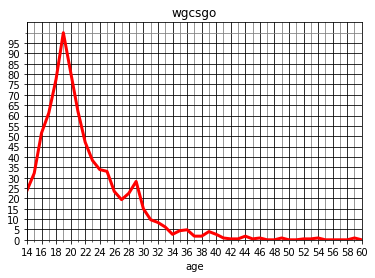

In [13]:
arr = []
for group in groups:
    with open(f'data/{group}/{group}_age.json') as f:
        data = json.load(f)
    tmp = []
    for i in data['age'].keys():
        tmp.append(data['age'][i])
    arr.append(tmp)
    
# Отрисовываем распределение возрастов
for i in range(len(arr)):
    x = [k for k in range(14, 14 + len(arr[i]))]
    y = arr[i]
    f = interp1d(x, y, kind='linear')
    y = f(x)
    y = [x / max(y) for x in y]
    y = [x * 100 for x in y]
    fig, ax = plt.subplots()
    ax.plot(x, y, color='r', linewidth=3)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
    plt.xlim((14, 60))
    plt.yticks([x for x in range(0, 100, 5)])
    plt.ylim(0)
    plt.xlabel('age')
    plt.title(f'{groups[i]}')
    plt.grid(which='major', color='black')
    plt.grid(which='minor', color='grey')
    plt.savefig(f'data/{groups[i]}/{groups[i]}_age.png')

## Какие темы групп популярны среди подписчиков?

In [12]:
from matplotlib import pyplot, transforms
from scipy import ndimage
import numpy as np
import json

In [13]:
def parse_topics():
    for group in groups:
        if not os.path.exists(f'data/{group}/{group}_groups_topics.json'):
            with open(f'data/{group}.json', 'r') as f:
                data = json.load(f)
            print(f'Create {group}.json')
            user = {}
            counter = 0
            for i in data.keys():
                # print(f'User - id {i}')
                gr = {}
                for k in data[i]['sub']['groups']['items']:
                    # print(k)
                    tmp = vk_api.groups.getById(group_id=int(k), fields=['activity'], v=5.92)[0]
                    try:
                        gr[k] = tmp['activity']
                    except:
                        pass
                user[i] = gr
                counter += 1
                print(counter)
                if counter % 50 == 0:
                    with open(f'data/{group}/{group}_groups_topics.json', 'w') as f:
                        json.dump(user, f, separators=(',', ':'), indent=4)
            print(f'Saved {group}_groups_topics.json.json')


# Собираем список самых популярных групп
def popular_groups():
    def popGroup(file_name):
        top = {}
        with open(f'data/{file_name}') as f:
            data = json.load(f)
            for k in data.keys():
                # print('current length of array -> {}'.format(len(top)))
                user = data[k]
                sub = user['sub']
                groups = sub['groups']['items']

                for group in groups:
                    result = top.get(group, None)
                    if result is None:
                        top[group] = 1
                    else:
                        top[group] += 1
        return sorted(top.items(), key=operator.itemgetter(1), reverse=True)

    def sort_dict(a):
        d = {}
        for i in range(1, 21):
            d[a[i][0]] = a[i][1]
        return d

    for group in groups:
        print(f'Create {group}.json')
        votes = popGroup('{}.json'.format(group))
        # print(votes)
        d = sort_dict(votes)
        with open(f'data/{group}/{group}_pop_groups.json', 'w') as outfile:
            json.dump(d, outfile, separators=(',', ':'), indent=4)


# Рисуем графики
def plot_groups():
    for group in groups:
        with open(f'data/{group}/{group}_pop_groups.json') as f:
            data = json.load(f)
        info = vk_api.groups.getById(group_ids=[i for i in data.keys()], v=5.92)
        names = []
        subs = []
        for i in range(len(info)):
            names.append(info[i]['name'])
        for i in data.keys():
            subs.append(data[i])
        subs = [x / max(subs) for x in subs]

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111)
        base = plt.gca().transData
        rot = transforms.Affine2D().rotate_deg(-90)
        ax.bar(range(len(names)), subs, transform=rot + base)
        names.reverse()
        plt.yticks(range(-19, 1), names)
        plt.title(f'{group}')
        plt.subplots_adjust(left=0.4)
        plt.savefig(f'data/{group}/{group}_groups.png')

#### \# Этот шаг можно пропустить

In [16]:

# Парсим топики групп у каждого подписчика
# parse_topics()
# Парсим популярные группы
# popular_groups()

e:\python\3.6\lib\site-packages\matplotlib\backends\backend_agg.py:217: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\3.6\lib\site-packages\matplotlib\backends\backend_agg.py:186: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


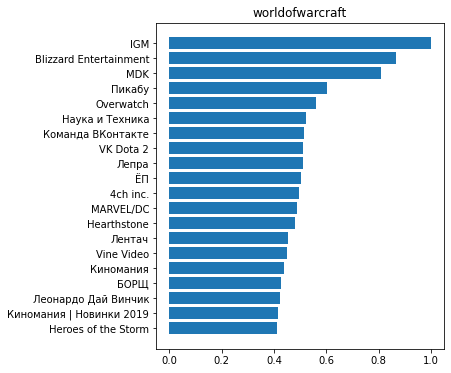

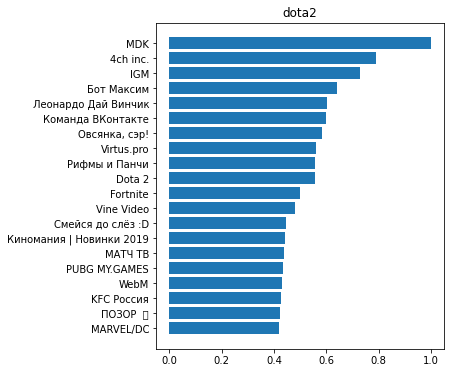

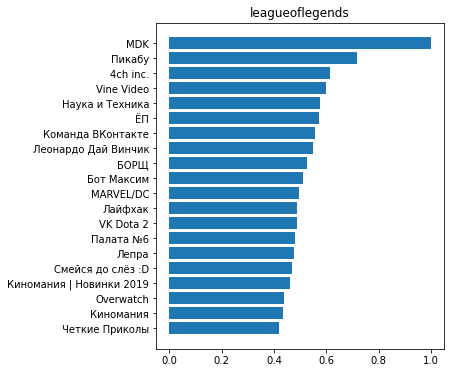

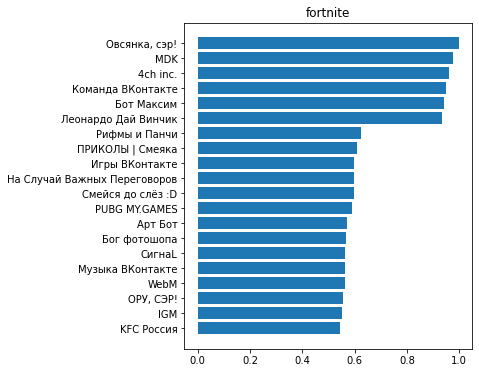

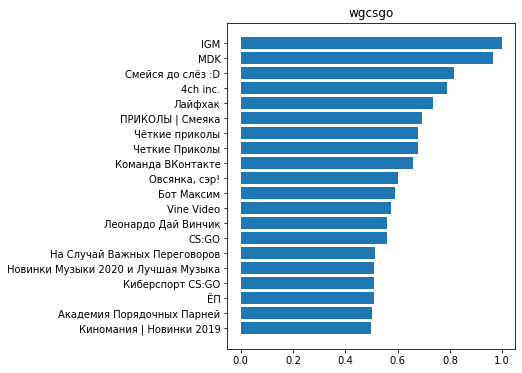

In [19]:
# Отрисовываем популярные группы
plot_groups()

## Нарисуем популярные тематики

In [20]:
import seaborn as sns

In [21]:

# Счетчик популярности категорий 

def counter(data):
    keys = data.keys()
    topics = {}

    for key in keys:
        user = data[key]
        items = user.keys()
        for item in items:
            topic = user[item]
            exsist = topics.get(topic)
            if exsist is None:
                topics[topic] = 1
            else:
                topics[topic] += 1        
    return topics


# Сортировка по популярности категорий
def sort(data):
    index = sorted(data.items(), key=operator.itemgetter(1), reverse=True)
    sorted_topic = {}

    for i in index:
        key, value = i
        if value >= 100:
            sorted_topic[key] = value
    return sorted_topic


# Сохранение
def save(file_name, data):
    with open(file_name, 'w') as file:
        json.dump(data, file, separators=(',', ':'), indent=4)


# Отрисовка
def params(length):
    x = []
    y = []
    count = 0
    x_shift = 1000
    y_shift = 1000
    for i in range(length):
        if count == 20:
            count = 0
            x_shift = 1000
            y_shift += 1000
        x.append(x_shift)
        y.append(y_shift)
        count += 1
    return [x, y]

def plotter(file_name, data):
    
    items = []
    labels = []

    # Top 5
    for key, item in data.items():
        if len(labels) >= 5:
            break
        labels.append(key)
        items.append(item)

    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(items, autopct='%1.1f%%', textprops=dict(color="w"))
    ax.legend(wedges, labels,
              title="Topics",
              loc='upper left',
              bbox_to_anchor=(-0.3, 1))
    plt.title(f'{file_name.split("/")[1]}')
    plt.savefig(file_name)
    plt.plot()
    return True


# Сборщик
def popTopic(file_name):
    with open(file_name) as file:
        try:
            data = json.load(file)
            topics = counter(data)
            topics = sort(topics)
            return topics
        except Exception as e:
            print(str(e))
            return None

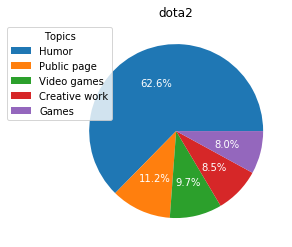

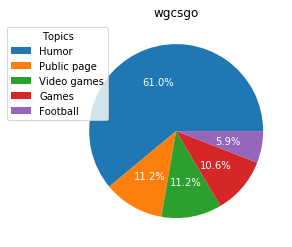

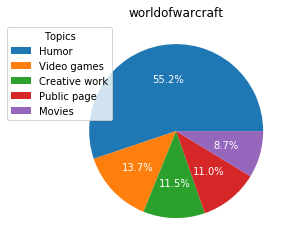

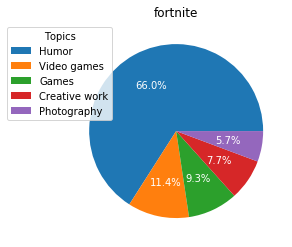

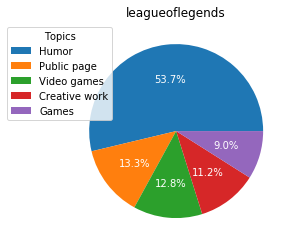

In [20]:
files = ['dota2', 'wgcsgo', 'worldofwarcraft', 'fortnite', 'leagueoflegends']
prefix = 'data/'
postfix = '_groups_topics.json'
postfix_save = '_popular_topics.json'

for file in files:
    path = '{}{}/{}{}'.format(prefix, file, file, postfix)
    topics = popTopic(path)
    plotter('data/{}/{}_topics.jpg'.format(file, file), topics)

    if topics is not None:
        save_path = '{}{}/{}{}'.format(prefix, file, file, postfix_save)
        save(save_path, topics)

In [22]:
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import pyLDAvis
import gensim
import pickle

from nltk.corpus import stopwords
import nltk

import pyLDAvis.gensim
import pymorphy2

import csv
import re

In [23]:
hot_words = ['розыгр', 'выигр', 'получ', 'конкурс', 'разыгр', 'приз', 'услов', 'участ']
hot_words_del = ['https', 'vk', 'com', 'http', 'ru',
                 'https_vk', 'youtube', 'www', 'club', 'id']
words_parazit = ['наш', 'ваш', 'её', 'свой', 'каждый', 'который', 'твой', 'cc', 'wall']

type_w = 'text'

In [ ]:
def convert_text():
    for group in groups:
        text = []
        repost = []
        with open(f'data/{group}.json', 'r') as f:
            data = json.load(f)
        text_k = 0
        repost_k = 0
        ad_post = 0
        for i in data.keys():
            for k in data[i]['wall']['items']:
                text.append(k['text'])
                text_k += 1
                try:
                    repost.append(k['copy_history'][0]['text'])
                    repost_k += 1
                    for word in hot_words:
                        if re.search(word.lower(), k['copy_history'][0]['text'].lower()) or\
                           re.search(word.lower(), k['text'].lower()):
                            ad_post += 1
                            break
                except:
                    pass
        print(f'{round(repost_k / text_k * 100)}% - {group} - Репосты')
        print(f'{round(ad_post / repost_k * 100)}% из них розыгрыши')
        fig1, ax1 = plt.subplots()
        plt.title(f'{fn}')
        ax1.pie([text_k - repost_k, repost_k - ad_post, ad_post], labels=['Прочее', 'Репосты', 'Розыгрыши'], autopct='%1.2f%%')
        plt.savefig(f'data/{group}/{group}_type_post.png')
        plt.plot()
        text_new = []
        for i in text:
            if i != '':
                text_new.append(i)
        np.save(f'data/{group}/{group}_all_text', np.asarray(text_new))
        repost_new = []
        for i in repost:
            if i != '':
                repost_new.append(i)
        np.save(f'data/{group}/{group}_all_text', np.asarray(repost_new))

        
"""convert text to array and save as numpy"""
# convert_text()


def lda(Filename, tt, topics=10):
    if tt == 1:
        data = np.load(f'data/{Filename}/{Filename}_all_{type_w}.npy')
    else:
        arr = 0
        for i in public_name:
            data = np.load(f'data/{i}/{i}_all_{type_w}.npy')
            if arr == 0:
                arr = data
            else:
                arr = np.concatenate((arr, data))
        data = arr
        np.save(f'data/all_{type_w}', data)

    nltk.download('stopwords')
    nltk.download('wordnet')
    stopwords_ru = stopwords.words('russian')
    stopwords_en = stopwords.words('english')

    x_train = [gensim.utils.simple_preprocess(text) for text in data]

    # Количество слов
    x_train = [x for x in x_train if len(x) > 50]

    # Работает ОЧЕНЬ МЕДЛЕННО!
    # lemm = Mystem()
    # Работает шикарно!
    morph = pymorphy2.MorphAnalyzer()

    def pos(word, morth=pymorphy2.MorphAnalyzer()):
        "Return a likely part of speech for the *word*."""
        return morth.parse(word)[0].tag.POS

    # Начальная форму
    x_train = [[morph.parse(word)[0].normal_form for word in i] for i in x_train]
    # https://pymorphy2.readthedocs.io/en/latest/user/grammemes.html
    # Удалить определенные части речи
    functors_pos = {'INTJ', 'PRCL', 'CONJ', 'PREP',
                    'COMP',
                    'ADVB',
                    'NPRO',
                    'VERB', 'INFN',
                    'ADJF', 'ADJS'}
    x_train = [[word for word in words if pos(word) not in functors_pos] for words in x_train]

    # Удаляю слова
    x_train = [[word for word in x if word not in stopwords_ru] for x in x_train]
    x_train = [[word for word in x if word not in stopwords_en] for x in x_train]
    x_train = [[word for word in x if word not in words_parazit] for x in x_train]

    fin = []
    for i in x_train:
        arr = []
        for k in i:
            c = 0
            for t in hot_words_del:
                if re.search(t, k):
                    c += 1
            if c == 0:
                arr.append(k)
        fin.append(arr)

    x_train = fin

    """Join compound words (Example: cs_go or more)"""

    """
    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(x_train, min_count=5, threshold=100)  # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[x_train], threshold=100)
    
    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    
    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]
    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]
    """

    # Form Bigrams
    # texts = make_bigrams(x_train)
    texts = x_train

    """<=============CREATE DICT=============>"""

    id2word = corpora.Dictionary(texts)
    corpus = [id2word.doc2bow(text) for text in texts]

    # слово должно встретиться хотябы 10 раз и не более чем в 60% документов
    id2word.filter_extremes(no_below=10, no_above=0.6)
    corpus = [id2word.doc2bow(text) for text in texts]

    from collections import defaultdict
    import itertools

    def word_freq_plot(dictionary, corpus, k2=100, k1=0):
        # Создаём по всем текстам словарик с частотами
        total_word_count = defaultdict(int)
        for word_id, word_count in itertools.chain.from_iterable(corpus):
            total_word_count[dictionary.get(word_id)] += word_count

        # Сортируем словарик по частотам
        sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True)

        # Делаем срез и по этому срезу строим картиночку
        example_list = sorted_word_count[k1:k2]
        word = []
        frequency = []
        for i in range(len(example_list)):
            word.append(example_list[i][0])
            frequency.append(example_list[i][1])

        indices = np.arange(len(example_list))

        plt.figure(figsize=(22, 10))
        plt.bar(indices, frequency)
        plt.xticks(indices, word, rotation='vertical', fontsize=12)
        plt.tight_layout()
        if tt == 1:
            if not os.path.isdir(f'data/{Filename}/LDA'):
                os.mkdir(f'data/{Filename}/LDA')
            plt.savefig(f'data/{Filename}/LDA/most_popular_words_{type_w}.jpg')
        else:
            plt.savefig(f'data/most_popular_words_{type_w}.jpg')
        # plt.show()

    word_freq_plot(id2word, corpus)

    """Cut too popular words"""

    '''
    print(len(id2word))
    arr = np.zeros((len(id2word)))
    print(arr.shape)
    for i in corpus:
        for k in i:
            print(int(k[0]))
            arr[k[0]] += 1
    
    plt.plot(arr)
    plt.show()
    
    bad_id = np.array([x for x in arr if x > 100])
    id2word.filter_tokens(bad_ids=bad_id)
    corpus = [id2word.doc2bow(text) for text in texts]
    '''

    print(f'Posts - {len(texts)}')

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=topics)

    if tt == 1:
        if not os.path.isdir(f'data/{Filename}/LDA'):
            os.mkdir(f'data/{Filename}/LDA')
        lda_model.save(f'data/{Filename}/LDA/LDA_model')
        # pyLDAvis.enable_notebook()  # Only in notebook
        visualisation = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
        pyLDAvis.save_html(visualisation, f'data/{Filename}/LDA/LDA_Visualization_{Filename}_{type_w}.html')
    else:
        lda_model.save(f'LDA_model')
        # pyLDAvis.enable_notebook()  # Only in notebook
        visualisation = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
        pyLDAvis.save_html(visualisation, f'LDA_Visualization_{type_w}.html')
    # print(lda_model.print_topics())

    topics = lda_model.show_topics(num_topics=5, num_words=50, formatted=False)
    print(topics)
    np.save(f'data/top_words/{Filename}_top_words_{type_w}', topics)


#### \# Это может занять много времению. Советуем не запускать! 

In [24]:

"""for i in public_name:
    lda(i, 1, topics=7)
    pass

lda('all', 0, topics=10)"""


"for i in public_name:\n    lda(i, 1, topics=7)\n    pass\n\nlda('all', 0, topics=10)"

## Теперь создадим облака слов

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import operator

In [28]:
def create_cloud(file_name, text, max_font_size=200, max_words=100, width=1200, height=800):
    try:
        wc = WordCloud(max_font_size=max_font_size, max_words=max_words,
                width=width, height=height, background_color="white")
        wc.generate(text)
        plt.subplot()
        plt.title(file_name)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.plot()
        plt.show()
        return True
    except Exception as e:
        return str(e)

def sort(data):
    popular = {}
    content = ''

    for category in data:
        words = category[1]
        for i in range(len(words)):
            if i > 20:
                break
            popular.setdefault(words[i][0], words[i][1])
    sort_popular = sorted(popular.items(), key=operator.itemgetter(1), reverse=True)
    for item in sort_popular:
        content += ' ' + item[0]
    return content


e:\python\3.6\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


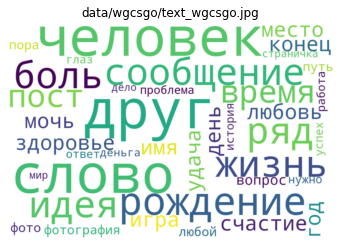

In [31]:
for group in groups:
    data = np.load('data/top_words/{}_top_words_text.npy'.format(group, group), allow_pickle=True)
    content = sort(data)
    status = create_cloud('data/{}/text_{}.jpg'.format(group, group), content)